In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scl=StandardScaler()

from sklearn.metrics import mean_squared_error

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

In [3]:
data_w = data.copy().resample('W').mean()

In [4]:
data_w.drop('hour', axis=1,inplace=True)
data_w.drop('year', axis=1,inplace=True)
data_w.drop('dayofmonth', axis=1,inplace=True)
data_w.drop('dayofyear', axis=1,inplace=True)
data_w.drop('dayofweek', axis=1,inplace=True)
data_w.drop('is_holiday', axis=1,inplace=True)
data_w.drop('is_prev_holiday', axis=1,inplace=True)
data_w.drop('is_next_holiday', axis=1,inplace=True)
data_w.head()

,PJME_MW,month,quarter,weekofyear
Date,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0
2002-01-13,31487.386905,1.000000,1.0,2.0
2002-01-20,31452.880952,1.000000,1.0,3.0
2002-01-27,30141.529762,1.000000,1.0,4.0
2002-02-03,29196.488095,1.428571,1.0,5.0


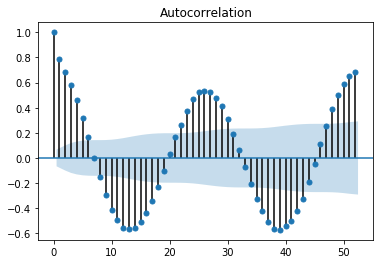

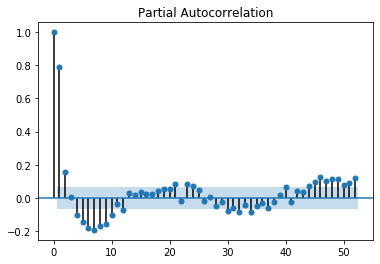

In [5]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(data_w['PJME_MW'].values, lags=52)
plt.show()
sm.graphics.tsa.plot_pacf(data_w['PJME_MW'].values, lags=52)
plt.show()

In [6]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

In [7]:
data_w['13w']=data_w['PJME_MW'].rolling(window=13).mean()
data_w['6w']=data_w['PJME_MW'].rolling(window=6).mean()
data_w['26w']=data_w['PJME_MW'].rolling(window=26).mean()

In [8]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_0_03'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)
data_w['exp_0_07'] = exponential_smoothing(data_w['PJME_MW'], 0.07)
data_w['exp_0_09'] = exponential_smoothing(data_w['PJME_MW'], 0.09)


In [9]:
data_w.iloc[10:15,:]

,PJME_MW,month,quarter,weekofyear,diff1,13w,6w,26w,exp_0_01,exp_0_03,exp_0_05,exp_0_07,exp_0_09
Date,,,,,,,,,,,,,
2002-03-17,28672.779762,3.0,1.0,11.0,-768.130981,NaN,29815.652778,NaN,32172.644070,31778.269476,31436.852496,31141.319713,30885.458277
2002-03-24,29927.488095,3.0,1.0,12.0,1254.708374,NaN,29611.814484,NaN,32150.192511,31722.746034,31361.384276,31056.351500,30799.240960
2002-03-31,27595.869048,3.0,1.0,13.0,-2331.619141,30083.670797,29108.365079,NaN,32104.649276,31598.939725,31173.108514,30814.117728,30510.937488
2002-04-07,28308.778443,4.0,2.0,14.0,712.909424,29769.564459,28969.139661,NaN,32066.690568,31500.234886,31029.892011,30638.743978,30312.743174
2002-04-14,27182.482143,4.0,2.0,15.0,-1126.296265,29438.417939,28521.384701,NaN,32017.848483,31370.702304,30837.521517,30396.805650,30031.019681


C:\Users\Julia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


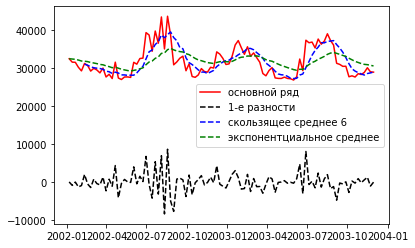

In [10]:
N100=100
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_w.index[:N100],data_w['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_w.index[:N100],data_w['6w'][:N100],'--b',label ='скользящее среднее 6')
plt.plot(data_w.index[:N100],data_w['exp_0_09'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()

In [11]:
p = 26 # длительность цикла 26 точек
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]

In [12]:
p = 26
for i in range(p):
    data_w['d'+str(p-i)]=0
    data_w['d'+str(p-i)].values[p:] = data_w['diff1'].values[i:-(p)+i]

In [13]:
data_w.head(10)

,PJME_MW,month,quarter,weekofyear,diff1,13w,6w,26w,exp_0_01,exp_0_03,...,d10,d9,d8,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.000000,NaN,NaN,NaN,32392.160839,32392.160839,...,0,0,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,1.000000,1.0,2.0,-904.773926,NaN,NaN,NaN,32383.113100,32365.017621,...,0,0,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,1.000000,1.0,3.0,-34.505951,NaN,NaN,NaN,32373.810778,32337.653521,...,0,0,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,1.000000,1.0,4.0,-1311.351196,NaN,NaN,NaN,32351.487968,32271.769808,...,0,0,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,1.428571,1.0,5.0,-945.041687,NaN,NaN,NaN,32319.937969,32179.511357,...,0,0,0,0,0,0,0,0,0,0
2002-02-10,31150.517857,2.000000,1.0,6.0,1954.029785,NaN,30970.160735,NaN,32308.243768,32148.641552,...,0,0,0,0,0,0,0,0,0,0
2002-02-17,30616.565476,2.000000,1.0,7.0,-533.952393,NaN,30674.228175,NaN,32291.326985,32102.679270,...,0,0,0,0,0,0,0,0,0,0
2002-02-24,29144.130952,2.000000,1.0,8.0,-1472.434570,NaN,30283.685516,NaN,32259.855025,32013.922820,...,0,0,0,0,0,0,0,0,0,0
2002-03-03,29869.011905,2.428571,1.0,9.0,724.880981,NaN,30019.707341,NaN,32235.946594,31949.575493,...,0,0,0,0,0,0,0,0,0,0


In [14]:
scl_target=StandardScaler() 

h=1
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(839, 1)

In [15]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(839, 65)

In [16]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
#for i in range(X.shape[1]):
    #print("F-test={:.2f},  I={}".format(f_test[i],i))

In [17]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(839, 5)

In [18]:
column_names = data_w.columns[sfk.get_support()]
column_names

Index(['PJME_MW', '6w', 't12', 't2', 't1'], dtype='object')

In [19]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(839, 7)

In [20]:
column_namesp = data_w.columns[sfp.get_support()]
column_namesp

Index(['PJME_MW', '6w', 't13', 't12', 't11', 't2', 't1'], dtype='object')

In [21]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(839, 5)

In [22]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0  6 27 37 38]
Номера признаков лучших признаков по процентной форме:  [ 0  6 26 27 28 37 38]
Номера признаков для выбора по модели :  [ 0 13 15 16 28]


In [40]:
list_par=[0,6,26,27,28,37,38]
X_new = X[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', '6w', 't13', 't12', 't11', 't2', 't1'], dtype='object')

In [41]:
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

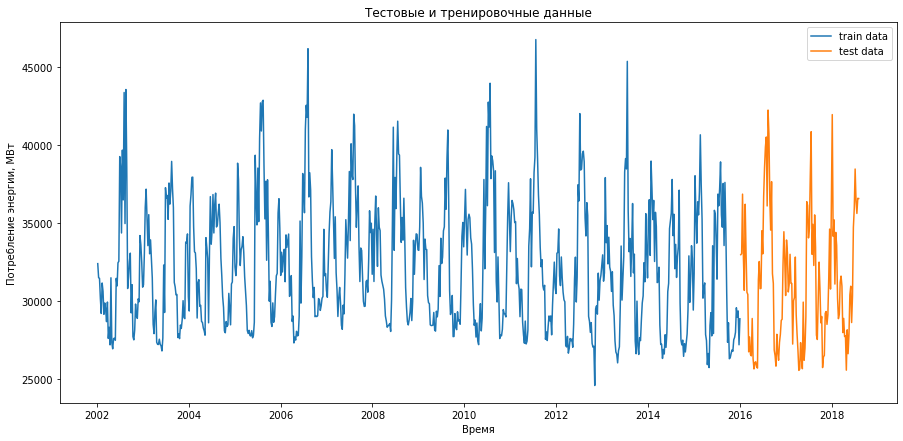

In [42]:
train, test = split_data( data_w, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [43]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [44]:
X_train.shape

(731, 7)

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [47]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [48]:
X_test.shape

(108, 7)

In [49]:
y_test_pred_g = model_g.predict(X_test)

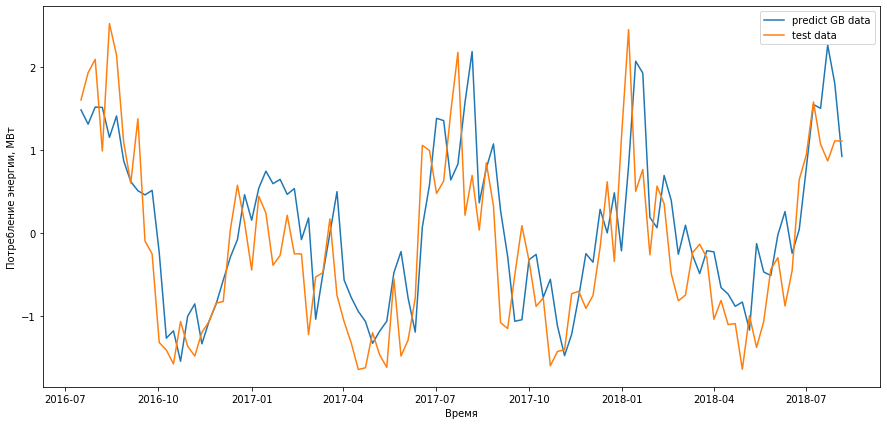

In [50]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [52]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.5123032577429018 
ошибка mae  :   0.5791815121909271 
оценка R2 :   0.5270154539965144


In [53]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.385735336953471 %


In [55]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.656 (std: 0.067)
Parameters: {'n_estimators': 200, 'max_depth': 1}

Model with rank: 2
Mean validation score: 0.650 (std: 0.073)
Parameters: {'n_estimators': 300, 'max_depth': 1}

Model with rank: 3
Mean validation score: 0.650 (std: 0.073)
Parameters: {'n_estimators': 100, 'max_depth': 3}



In [56]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=200)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.848730139136528 %


при h = 4

In [58]:
h=4
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape
 
X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)

sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

column_names = data_w.columns[sfk.get_support()]
column_names

Index(['t23', 't22', 't10', 't9', 't8'], dtype='object')

In [61]:
list_param =np.where(sfk.get_support())[0]
list_param

In [64]:
X_new = X[:,list_param]
data_w.columns[list_param]

Index(['t23', 't22', 't10', 't9', 't8'], dtype='object')

In [65]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [66]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [67]:
y_test_pred_g = model_g.predict(X_test)

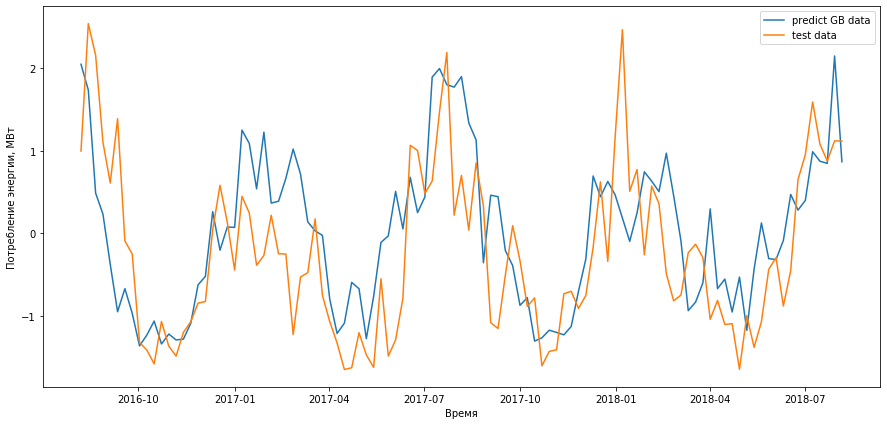

In [68]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [69]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   8.5779014510571 %
